In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing     import MinMaxScaler
import seaborn as sns

from sklearn.model_selection   import KFold
from sklearn.svm               import SVR


#Classification Libraries
from sklearn.neighbors         import KNeighborsClassifier
from sklearn                   import metrics
from sklearn.model_selection   import train_test_split

from sklearn.tree              import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.tree              import export_graphviz
from sklearn.externals.six     import StringIO  
from IPython.display           import Image  
import pydotplus

from sklearn.linear_model      import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [0]:
def get_dummy_feature(df, column_name):
    
    df[column_name] = df[column_name].astype('object')

    dummies=pd.get_dummies(df[column_name], prefix=column_name) 
    
    df=pd.concat([df,dummies],axis=1) 
    
    df.drop(column_name,axis=1,inplace=True)
    
    return df 


In [0]:
def data_normalize(df):
    
    
    catcols = [ 'ACCOM_TYPE', 'CUSTOMER_CATEGORY','RISK_CATEGORY','SEX', 'MARITAL_STATUS', 'OCCUPN_CODE']
    
    for col in catcols:
        df = get_dummy_feature(df , col )
    
    #numcols = ['CUSTOMER_CODE', 'TIN_NUM_AVAILABLE', 'EXEMP_IN_TDS','ANNUAL_LIMIT',  'MONTHLY_LIMIT',  'AGE','BC_ANNUAL_INCOME', 'HAVE_INSUR_POLICY', 'PLAN_FOR_INSUR_POLICY' ]
    #catcols = ['CUSTOMER_TYPE','CUSTOMER_CATEGORY','CUSTOMER_SEGMENT_CODE','RISK_CATEGORY','SEX', 'MARITAL_STATUS', 'OCCUPN_CODE'  ]
    
    features = df.columns
    
    df = df.dropna()
    df = pd.DataFrame(df,columns=features)
    
    df.loc[(df.PRODUCTCATEGORY == 'Saving'),'PRODUCTCATEGORY']='1'
    df.loc[(df.PRODUCTCATEGORY == 'Current'),'PRODUCTCATEGORY']='2'
    df.loc[(df.PRODUCTCATEGORY == 'Fixed'),'PRODUCTCATEGORY']='3'
    df.loc[(df.PRODUCTCATEGORY == 'DPS'),'PRODUCTCATEGORY']='4'
    df.loc[(df.PRODUCTCATEGORY == 'Conti'),'PRODUCTCATEGORY']='5'
    df.loc[(df.PRODUCTCATEGORY == 'Term'),'PRODUCTCATEGORY']='6'
    
    df['PRODUCTCATEGORY'] = pd.to_numeric(df['PRODUCTCATEGORY'])
    
    df = pd.DataFrame(df,columns=features)
    X = df.copy()
    X = X.dropna()
    
    #print(X)
    return X

In [0]:
def fill_null_values(df, p_column_name):
    column_name = p_column_name
    df[column_name] = df[column_name].fillna(df[column_name].mode()[0])


def dataclean_null_values(df):
    for col in df.columns: 
        #fill_null_values(df, col)
        df[col] = df[col].fillna(df[col].mode()[0])
        
    return df 

In [0]:
def fatch_data_from_csv():
    file_path = "/content/drive/My Drive/MIT_1912/4th Sem/PROD_DATA.csv"
    df = pd.read_csv(file_path)
    return df

In [0]:
def create_featured_dataset(df):
    #print(df)
    del df['CUSTOMER_CODE']
    new_df = df[[#'BC_ANNUAL_INCOME', 
                 'AMOUNT_OF_CREDIT_TRAN', 'ACCOM_TYPE_1', 'AGE', 'AMOUNT_OF_DEBIT_TRAN', 'ANNUAL_INCOME_SLAB', 'NUMBER_OF_CREDIT_TRAN', 'NUMBER_OF_DEBIT_TRAN', 'OCCUPN_CODE_15', 'OCCUPN_CODE_5', 'TIN_NUM_AVAILABLE', 'MARITAL_STATUS_M', 'MARITAL_STATUS_S', 'OCCUPN_CODE_1', 'OCCUPN_CODE_12', 'OCCUPN_CODE_14', 'OCCUPN_CODE_24', 'OCCUPN_CODE_72', 'OCCUPN_CODE_77', 'OCCUPN_CODE_9', 'SEX_F', 'ACCOM_TYPE_3', 'EXEMP_IN_TDS', 'HAVE_INSUR_POLICY', 'OCCUPN_CODE_17', 'OCCUPN_CODE_22', 'OCCUPN_CODE_74', 'OCCUPN_CODE_99', 'SEX_M', 'BC_ANNUAL_INCOME', 'CUSTOMER_CATEGORY_2', 'PLAN_FOR_INSUR_POLICY', 'RISK_CATEGORY_1', 'RISK_CATEGORY_3', 'ACCOM_TYPE_6', 'RISK_CATEGORY_2', 'PRODUCTCATEGORY']].copy() 

    return new_df 

In [0]:
def RandomForestClassifier(df):
    print("I am RandomForestClassifier")
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    from imblearn.combine import SMOTETomek
    from imblearn.over_sampling import SMOTE
    from sklearn.metrics import accuracy_score
    
    X=df.drop('PRODUCTCATEGORY',axis=1)
    y=df.PRODUCTCATEGORY
    
    #smk = SMOTETomek(random_state=42)
    #X,y=smk.fit_sample(X,y)


    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)

    cv = KFold(n_splits=20, random_state=42, shuffle=True)
    #feature_cols = ['AMOUNT_OF_CREDIT_TRAN', 'ACCOM_TYPE_1', 'AGE', 'AMOUNT_OF_DEBIT_TRAN', 'ANNUAL_INCOME_SLAB', 'NUMBER_OF_CREDIT_TRAN', 'NUMBER_OF_DEBIT_TRAN', 'OCCUPN_CODE_15', 'OCCUPN_CODE_5', 'TIN_NUM_AVAILABLE', 'MARITAL_STATUS_M', 'MARITAL_STATUS_S', 'OCCUPN_CODE_1', 'OCCUPN_CODE_12', 'OCCUPN_CODE_14', 'OCCUPN_CODE_24', 'OCCUPN_CODE_72', 'OCCUPN_CODE_77', 'OCCUPN_CODE_9', 'SEX_F', 'ACCOM_TYPE_3', 'EXEMP_IN_TDS', 'HAVE_INSUR_POLICY', 'OCCUPN_CODE_17', 'OCCUPN_CODE_22', 'OCCUPN_CODE_74', 'OCCUPN_CODE_99', 'SEX_M', 'BC_ANNUAL_INCOME', 'CUSTOMER_CATEGORY_2', 'PLAN_FOR_INSUR_POLICY', 'RISK_CATEGORY_1', 'RISK_CATEGORY_3', 'ACCOM_TYPE_6', 'RISK_CATEGORY_2']
    
    round_number = 1 
    for train_index, test_index in cv.split(X):
        print("Round Number is " + str(round_number))
        round_number = round_number + 1
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
        sm = SMOTE(random_state = 33)
        X_train_new, y_train_new = sm.fit_sample(X_train, y_train.ravel())
        #print(X_train.columns())
        
        clf=RandomForestClassifier( n_estimators= 100)

        clf = clf.fit(X_train_new,y_train_new)
        # prediction for Training data
        train_pred_sm = clf.predict(X_train_new)

        # prediction for Testing data
        test_pred_sm = clf.predict(X_test)


        #y_pred = clf.predict(X_test) 
        print('Accuracy score for Training Dataset = ', accuracy_score(train_pred_sm, y_train_new))
        print('Accuracy score for Testing Dataset = ', accuracy_score(test_pred_sm, y_test))    
        #print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

        print('Accuracy report for Training')
        print(metrics.classification_report(train_pred_sm, y_train_new, digits=3))

        print('Accuracy report for Testing')
        print( metrics.classification_report(y_test, test_pred_sm, digits=3))
        
        

In [0]:
df = fatch_data_from_csv()

In [0]:
df = dataclean_null_values(df)

In [12]:
df


CUSTOMER_CODE CUSTOMER_TYPE  ...  AMOUNT_OF_CREDIT_TRAN  PRODUCTCATEGORY
0        4.820000e+11             I  ...                 246148           Saving
1        9.880000e+11             I  ...                   1000           Saving
2        9.440000e+11             I  ...                2494093           Saving
3        9.760000e+11             I  ...                   1000           Saving
4        6.620000e+11             I  ...                  19163           Saving
...               ...           ...  ...                    ...              ...
208196   9.570000e+11             I  ...                1535963           Saving
208197   7.640000e+11             I  ...                1109812           Saving
208198   9.300000e+11             I  ...                 234229           Saving
208199   8.880000e+11             I  ...                2800823           Saving
208200   7.640000e+11             I  ...                  28000             Term

[208201 rows x 34 columns]

In [13]:
# import the seaborn libaray 
import seaborn as sns 
  
# import done to avoid warnings  
from warnings import filterwarnings 
  
# first five entries if the dataset 
df.head() 

CUSTOMER_CODE CUSTOMER_TYPE  ...  AMOUNT_OF_CREDIT_TRAN  PRODUCTCATEGORY
0   4.820000e+11             I  ...                 246148           Saving
1   9.880000e+11             I  ...                   1000           Saving
2   9.440000e+11             I  ...                2494093           Saving
3   9.760000e+11             I  ...                   1000           Saving
4   6.620000e+11             I  ...                  19163           Saving

[5 rows x 34 columns]

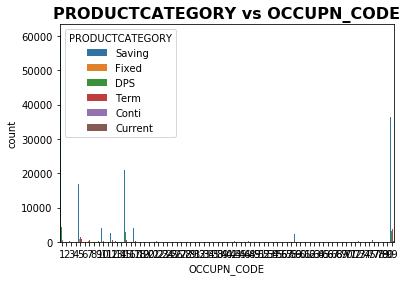

In [23]:

sns.countplot(x="OCCUPN_CODE", hue="PRODUCTCATEGORY", data=df)
plt.title('PRODUCTCATEGORY vs OCCUPN_CODE', weight='bold', fontsize=16)
plt.show()

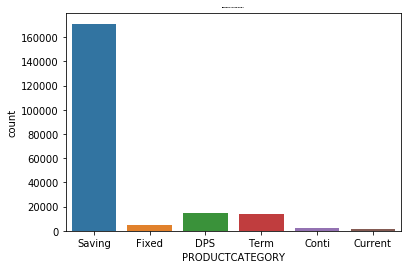

In [26]:


sns.countplot(x="PRODUCTCATEGORY", data=df)
plt.title('PRODUCTCATEGORY', weight='bold', fontsize=2)
plt.show()